<center><h1 style="font-family: 'Georgia'; color: #f2f2f2; background-color:#800040; padding: 20px;">Income Clustering Utilizing MinMaxScaler
    </h1></center>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
Income clustering by age using the MinMaxScaler to get better results.
</p>

<p style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040;">
dataset link: https://github.com/codebasics/py/blob/master/ML/13_kmeans/income.csv
</p>

In [87]:
# IMPORT LIBRARIES 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [88]:
# LOAD DATASET
df = pd.read_csv('income.csv')
df.head(7)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000


In [89]:
# EXAMINE THE DATASET
df.shape

(22, 3)

In [90]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [91]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [92]:
# CHECK NULL VALUES
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [93]:
# REMOVE IRRELAVANT COLUMNS
df.drop(columns=['Name'], axis=1, inplace=True)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


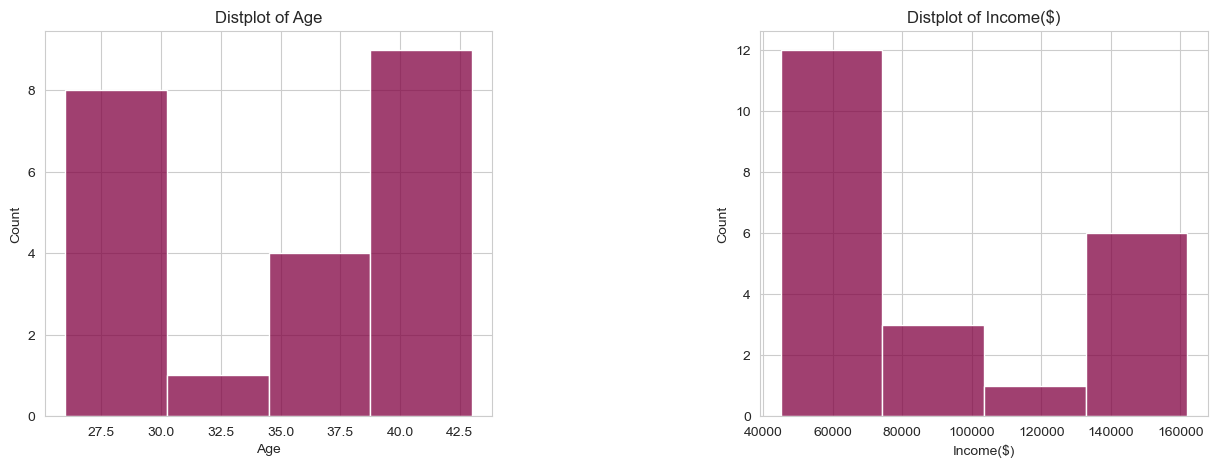

In [94]:
# VISUALIZE THE DISTRIBUTION OF DATA FOR EACH COLUMNS
plt.figure(1, figsize=(15,5))
n = 1

for col in df.columns:
    sns.set_style('whitegrid')
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace=0.6, wspace=0.6)
    sns.histplot(df[col], bins=4, color='#800040')
    plt.title('Distplot of {}'.format(col))
    n += 1
    
plt.show()

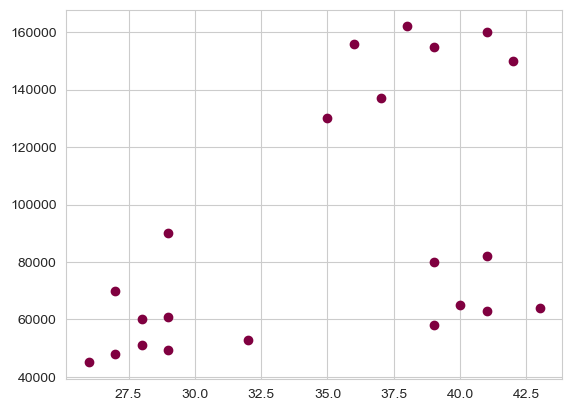

In [95]:
# SCATTERPLOT
plt.scatter(x=df['Age'], y=df['Income($)'], color='#800040')
# this also works
# sns.relplot(x='Age', y='Income($)', data=df, color='#800040')

<span style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
By inspection,
</span>

<span style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040;">
we can see that we can effectively cluster these data into 3 groups.
</span>

In [96]:
# CREATING A KMEANS OBJECT
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [97]:
# PREDICTING VALUES
import warnings                          #ignoring warnings
warnings.filterwarnings("ignore")

y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [98]:
# ADD THE CLUSTER COLUMN TO df
df['cluster'] = y_pred
df.head(10)

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


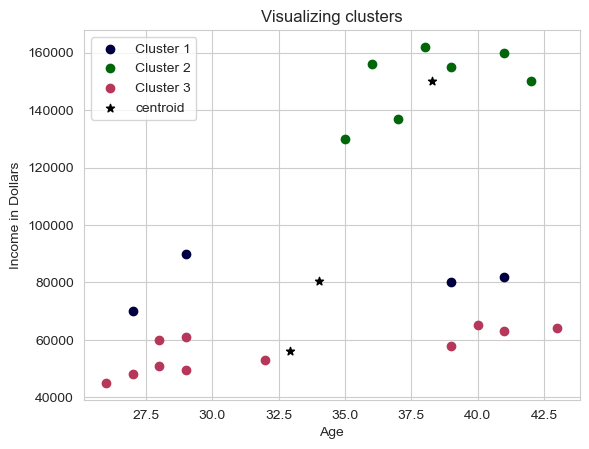

In [100]:
# PLOT THE CLUSTER WITH YOU SETTING THE COLORS, YIEE
pallete = ['#000040', '#006609', '#b7375b']

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], label='Cluster 1', color=pallete[0])
plt.scatter(df2.Age, df2['Income($)'], label='Cluster 2', color=pallete[1])
plt.scatter(df3.Age, df3['Income($)'], label='Cluster 3', color=pallete[2])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='centroid')

plt.title('Visualizing clusters')
plt.xlabel('Age')
plt.ylabel('Income in Dollars')
plt.legend()

<span style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040;">
We can see that cluster 1 and cluster 3 are <span style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
not clustered right
</span>. We can solve this by scaling the columns so we have data to work with.  
</span>

In [101]:
# SCALING THE COLUMNS
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])

In [102]:
# PRINT THE SCALED DF
df.head(7)

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1


In [103]:
# RECREATING A KMEANS OBJECT
km_scaled = KMeans(n_clusters=3)
km_scaled

KMeans(n_clusters=3)

In [104]:
# PREDICTING VALUES
import warnings                          #ignoring warnings
warnings.filterwarnings("ignore")

y_pred_scaled = km_scaled.fit_predict(df[['Age', 'Income($)']])
y_pred_scaled

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [105]:
# ADD THE CLUSTER_SCALED COLUMN TO df
df['cluster_scaled'] = y_pred_scaled
df.head(10)

,Age,Income($),cluster,cluster_scaled
0,0.058824,0.213675,0,0
1,0.176471,0.384615,0,0
2,0.176471,0.136752,2,0
3,0.117647,0.128205,2,0
4,0.941176,0.897436,1,1
5,0.764706,0.940171,1,1
6,0.882353,0.982906,1,1
7,0.705882,1.000000,1,1
8,0.588235,0.948718,1,1
9,0.529412,0.726496,1,1


In [106]:
# GETTING THE LIST OF CLUSTER CENTERS
km_scaled.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

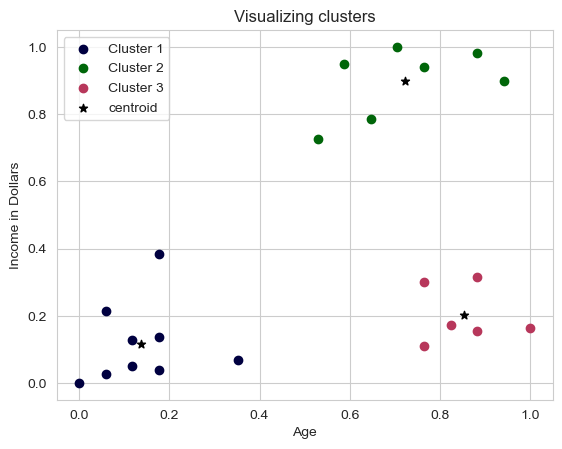

In [107]:
# PLOT THE CLUSTER WITH YOU SETTING THE COLORS, YIEE

pallete = ['#000040', '#006609', '#b7375b']

df1 = df[df.cluster_scaled == 0]
df2 = df[df.cluster_scaled == 1]
df3 = df[df.cluster_scaled == 2]

plt.scatter(df1.Age, df1['Income($)'], label='Cluster 1', color=pallete[0])
plt.scatter(df2.Age, df2['Income($)'], label='Cluster 2', color=pallete[1])
plt.scatter(df3.Age, df3['Income($)'], label='Cluster 3', color=pallete[2])
plt.scatter(km_scaled.cluster_centers_[:, 0], km_scaled.cluster_centers_[:, 1], color='black', marker='*', label='centroid')

sns.set_style('whitegrid')
plt.title('Visualizing clusters')
plt.xlabel('Age')
plt.ylabel('Income in Dollars')
plt.legend()

<span style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040;">
We <span style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
successfully clustered</span>. the data into 3 clusters. 
    This notebook <span style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">did not ulitize the elbow method</span>, since at the first glance on the data, it is easily inferred that n_clusters = 3. 
</span>